# Import (Libraries & Functions)

In [2]:
import time
start_time = time.time()      

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import pickle

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [9]:

## Setting the enc# Loading pickel file for one patient S1.
path = "data/S1/S1.pkl"
with open(path, "rb") as f:
    data = pickle.load(f, encoding="latin-1") oding to latin1 allows to import the data directly:

## But we need to verify that none of the strings are decoded using the wrong codec; Latin-1 works for any input as it maps the byte values 0-255 to the first 256 Unicode codepoints directly.


In [10]:
data.keys() 

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [14]:
data["subject"]

'S1'

In [15]:
data["signal"]

{'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
         [ 0.8556    , -0.06900001, -0.3646    ],
         [ 0.852     , -0.07020003, -0.3642    ],
         ...,
         [ 0.88759995, -0.1038    , -0.27920002],
         [ 0.88619995, -0.10159999, -0.27819997],
         [ 0.88680005, -0.10140002, -0.27380002]]),
  'ECG': array([[0.01560974],
         [0.01812744],
         [0.01753235],
         ...,
         [0.21368408],
         [0.21556091],
         [0.21702576]]),
  'EMG': array([[-1.5],
         [-1.5],
         [-1.5],
         ...,
         [-1.5],
         [-1.5],
         [-1.5]]),
  'EDA': array([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
  'Temp': array([[-273.15],
         [-273.15],
         [-273.15],
         ...,
         [-273.15],
         [-273.15],
         [-273.15]], dtype=float32),
  'Resp': array([[ 4.4418335 ],
         [ 4.45098877],
         [ 4.47387695],
         ...,
         [-3.050

In [ ]:
data["label"] # ‘label’ includes the heart rate ground truth for the 8-second 
# segments, shifted with 2-seconds (the labels were extracted from the ECG-signal).

In [14]:
data["activity"]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [15]:
data["questionnaire"]

{'WEIGHT': 78.0,
 'Gender': ' m',
 'AGE': 34,
 'HEIGHT': 182.0,
 'SKIN': 3,
 'SPORT': 6}

In [11]:
data["rpeaks"]

array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224])

## Activity

In [16]:
 activity = pd.DataFrame(data["activity"]).astype(int)
activity.columns = ["Activity"]
print(activity.shape)
activity.head()

(36848, 1)


,Activity
0,0
1,0
2,0
3,0
4,0


In [17]:
activity["Activity"].value_counts()

6    9420
0    9124
8    4756
5    3556
7    3016
1    2800
4    1648
3    1380
2    1148
Name: Activity, dtype: int64

- __Sitting (ID: 1)__: Sitting still while reading. The aim of this activity was to generate a motionartefact-free baseline.
- __Ascending and descending stairs (ID: 2)__: Climbing six floors up and going down again,
repeating this twice. This activity was carried out in the main building at our research
campus. Note: for subjects S1 and S2, going down was performed only once.
- __Table soccer (ID: 3)__: Playing table soccer, 1 vs. 1 with the supervisor of the data collection.
- __Cycling (ID: 4)__: Performed outdoors, around our research campus, following a defined route
of about 2km length with varying road conditions (gravel, paved).
- __Driving a car (ID: 5)__: This activity started at the parking ground of our research campus and
was carried out within the area nearby. Subjects followed a defined route which took about
15 minutes to complete. The route included driving on different streets in a small city as well
as driving on country roads.
- __Lunch break (ID: 6)__: This activity was carried out at the canteen of our research campus. The
activity included queuing and fetching food, eating, and talking at the table.
- __Walking (ID: 7)__: This activity was carried out within the premises of our research campus,
walking back from the canteen to the office, with some detour.
- __Working (ID: 8)__: Subjects returned to their desk and worked as if not participating in this
study. For each subject, work mainly consisted of working on a computer

In [18]:
dic_activity = {1: "Sitting", 2: "Stairs", 3: "Soccer", 4: "Cycling", 5: "Driving", 6: "Lunch", 7: "Walking", 8: "Working"}

## Label

In [19]:
label = pd.DataFrame(data["label"])
label.shape

(4603, 1)

In [20]:
label = pd.DataFrame(np.repeat(label.values,8,axis=0))
label.columns = ["Label"]
if(np.size(label, axis = 0) < np.size(activity, axis = 0)):
    mean = label.mean()
    while(np.size(label, axis = 0) < np.size(activity, axis = 0)):
        label = label.append(mean, ignore_index=True)
label

C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\528511043.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append(mean, ignore_index=True)
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\528511043.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append(mean, ignore_index=True)
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\528511043.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append(mean, ignore_index=True)
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\528511043.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append(mean, ignore_index=True)
C:\U

,Label
0,49.611369
1,49.611369
2,49.611369
3,49.611369
4,49.611369
...,...
36843,74.838901
36844,74.838901
36845,74.838901
36846,74.838901


## Signal Data

In [21]:
signal = pd.DataFrame(data["signal"])
signal

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."


### Chest

The modalities ‘EDA’, ‘EMG’ and ‘Temp’ only include dummy data and should thus be ignored.

In [22]:
Resp = pd.DataFrame(signal["chest"].Resp)
Resp = Resp.iloc[::175, :]
Resp.columns = ["Resp"]
Resp.reset_index(drop = True, inplace=True)
Resp

,Resp
0,4.441833
1,4.876709
2,3.340149
3,0.740051
4,-1.475525
...,...
36843,-2.183533
36844,-1.872253
36845,-2.696228
36846,-3.175354


In [23]:
ECG = pd.DataFrame(signal["chest"].ECG)
ECG = ECG.iloc[::175, :]
ECG.reset_index(drop = True, inplace=True)
ECG

,0
0,0.015610
1,-0.015747
2,-0.008743
3,-0.339523
4,-0.089905
...,...
36843,-0.091507
36844,-0.159714
36845,0.074890
36846,-0.110779


In [24]:
ACC = pd.DataFrame(signal["chest"].ACC)
ACC = ACC.iloc[::175, :]
ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
ACC.reset_index(drop = True, inplace=True)
ACC

,ACC_x,ACC_y,ACC_z
0,0.8564,-0.0678,-0.3656
1,0.8514,-0.0654,-0.3688
2,0.8514,-0.0662,-0.3708
3,0.8594,-0.0632,-0.3640
4,0.8510,-0.0674,-0.3694
...,...,...,...
36843,0.8956,-0.1158,-0.2526
36844,0.8888,-0.1062,-0.2684
36845,0.8802,-0.0966,-0.2938
36846,0.8842,-0.0962,-0.2820


In [25]:
chest = pd.concat([ACC], sort=False)
chest["Resp"] = Resp
chest["ECG"] = ECG
chest.reset_index(drop=True, inplace=True)
chest = chest.add_prefix('chest_')
chest

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG
0,0.8564,-0.0678,-0.3656,4.441833,0.015610
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905
...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779


### Wrist

In [26]:
ACC = pd.DataFrame(signal["wrist"].ACC)
ACC = ACC.iloc[::8, :]
ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
ACC.reset_index(drop = True, inplace=True)
ACC

,ACC_x,ACC_y,ACC_z
0,-0.765625,-0.078125,0.671875
1,-0.765625,-0.078125,0.671875
2,-0.765625,-0.078125,0.671875
3,-0.750000,-0.078125,0.671875
4,-0.765625,-0.078125,0.671875
...,...,...,...
36843,-0.375000,-0.015625,0.937500
36844,-0.359375,-0.015625,0.953125
36845,-0.437500,-0.015625,0.906250
36846,-0.390625,-0.015625,0.921875


In [27]:
EDA = pd.DataFrame(signal["wrist"].EDA)
EDA.columns = ["EDA"]
EDA

,EDA
0,4.722437
1,4.728843
2,4.718594
3,4.717312
4,4.713469
...,...
36843,3.199053
36844,3.186241
36845,3.170867
36846,3.159336


In [28]:
BVP = pd.DataFrame(signal["wrist"].BVP)
BVP = BVP.iloc[::16, :]
BVP.columns = ["BVP"]
BVP.reset_index(drop = True, inplace=True)
BVP

,BVP
0,7.28
1,-11.36
2,-51.27
3,5.65
4,34.34
...,...
36843,22.62
36844,116.83
36845,-18.36
36846,-6.64


In [29]:
TEMP = pd.DataFrame(signal["wrist"].TEMP)
TEMP.columns = ["TEMP"]
TEMP

,TEMP
0,32.13
1,32.16
2,32.16
3,32.16
4,32.16
...,...
36843,34.37
36844,34.37
36845,34.37
36846,34.37


In [30]:
wrist = pd.concat([ACC], sort=False)
wrist["BVP"] = BVP
wrist["TEMP"] = TEMP
wrist.reset_index(drop = True, inplace=True)
wrist = wrist.add_prefix('wrist_')
wrist

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP
0,-0.765625,-0.078125,0.671875,7.28,32.13
1,-0.765625,-0.078125,0.671875,-11.36,32.16
2,-0.765625,-0.078125,0.671875,-51.27,32.16
3,-0.750000,-0.078125,0.671875,5.65,32.16
4,-0.765625,-0.078125,0.671875,34.34,32.16
...,...,...,...,...,...
36843,-0.375000,-0.015625,0.937500,22.62,34.37
36844,-0.359375,-0.015625,0.953125,116.83,34.37
36845,-0.437500,-0.015625,0.906250,-18.36,34.37
36846,-0.390625,-0.015625,0.921875,-6.64,34.37


### Fusing both

In [31]:
signals = chest.join(wrist)
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16
...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37


In [32]:
for k,v in data["questionnaire"].items() :
    signals[k] = v
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,m,34,182.0,3,6
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,78.0,m,34,182.0,3,6
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,78.0,m,34,182.0,3,6
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,78.0,m,34,182.0,3,6
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,78.0,m,34,182.0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,78.0,m,34,182.0,3,6
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,78.0,m,34,182.0,3,6
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,78.0,m,34,182.0,3,6
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,78.0,m,34,182.0,3,6


### Counting Rpeaks

We will cound for each 175 portion (0.25 sec since 700 is 1sec) the number of rpeaks during that period.

In [33]:
rpeaks = data['rpeaks']
rpeaks

array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224])

In [34]:
counted_rpeaks = []
index = 0 # index of rpeak element
myTime = 175 # myTime portion
count = 0 # number of rpeaks

while(index < len(rpeaks)):
    rpeak = rpeaks[index]
    
    if(rpeak > myTime): # Rpeak appears after the myTime portion
        counted_rpeaks.append(count)
        count = 0
        myTime += 175
        
    else:
        count += 1
        index += 1
        
# The rpeaks will probably end before the myTime portion so we need to fill the last portions with 0
if(len(counted_rpeaks) < 36848):
    while(len(counted_rpeaks) < 36848):
        counted_rpeaks.append(0)

In [35]:
peaks = pd.DataFrame(counted_rpeaks)
peaks.columns = ["Rpeaks"]
peaks

,Rpeaks
0,0
1,1
2,0
3,0
4,0
...,...
36843,0
36844,1
36845,0
36846,0


In [36]:
signals.head()

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,m,34,182.0,3,6
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,78.0,m,34,182.0,3,6
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,78.0,m,34,182.0,3,6
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,78.0,m,34,182.0,3,6
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,78.0,m,34,182.0,3,6


In [37]:
signals = signals.join(peaks)
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,m,34,182.0,3,6,0
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,78.0,m,34,182.0,3,6,1
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,78.0,m,34,182.0,3,6,0
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,78.0,m,34,182.0,3,6,0
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,78.0,m,34,182.0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,78.0,m,34,182.0,3,6,0
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,78.0,m,34,182.0,3,6,1
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,78.0,m,34,182.0,3,6,0
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,78.0,m,34,182.0,3,6,0


### Fusing with Activity & Label

In [38]:
signals = signals.join(activity)
signals = signals.join(label)
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,Label
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,m,34,182.0,3,6,0,0,49.611369
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,78.0,m,34,182.0,3,6,1,0,49.611369
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,78.0,m,34,182.0,3,6,0,0,49.611369
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,78.0,m,34,182.0,3,6,0,0,49.611369
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,78.0,m,34,182.0,3,6,0,0,49.611369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,78.0,m,34,182.0,3,6,0,0,74.838901
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,78.0,m,34,182.0,3,6,1,0,74.838901
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,78.0,m,34,182.0,3,6,0,0,74.838901
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,78.0,m,34,182.0,3,6,0,0,74.838901


In [39]:
signals['Subject'] = data["subject"]

## Visualisation

Text(0, 0.5, 'Temperature')

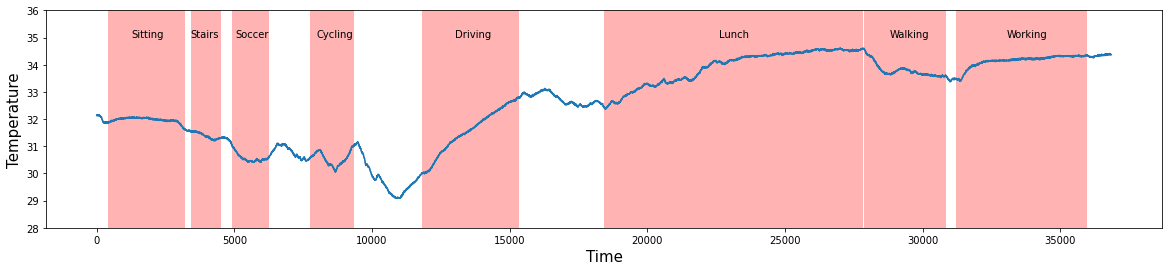

In [40]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 35, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1

ax.set_ylim(top = 36, bottom = 28)
signals.loc[:, 'wrist_TEMP'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Temperature", fontsize=15)

Text(0, 0.5, 'chest_ECG')

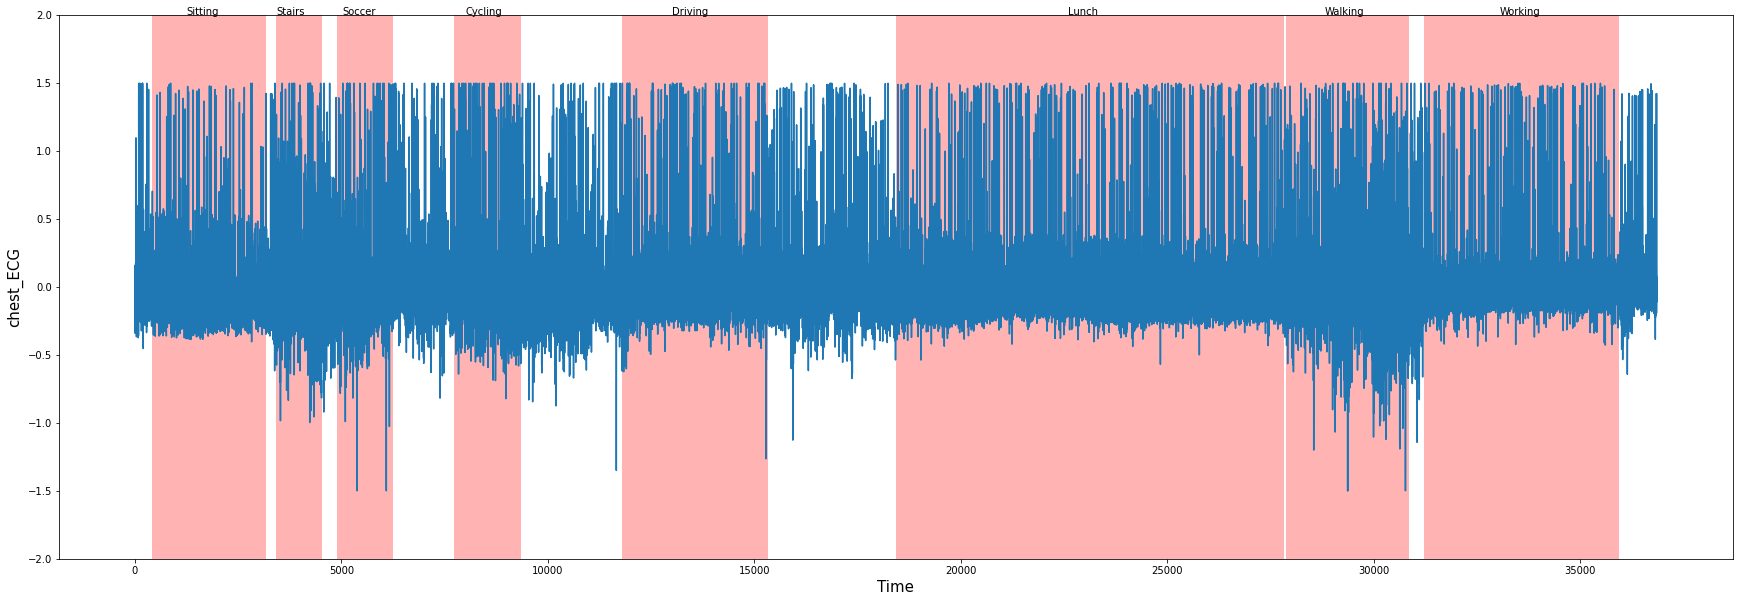

In [41]:
# Testing 1
fig, ax = plt.subplots(figsize=(30, 10))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2- 500,2, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1

ax.set_ylim(top = 2, bottom = -2)
signals.loc[:, 'chest_ECG'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("chest_ECG", fontsize=15)

Text(0, 0.5, 'wrist_BVP')

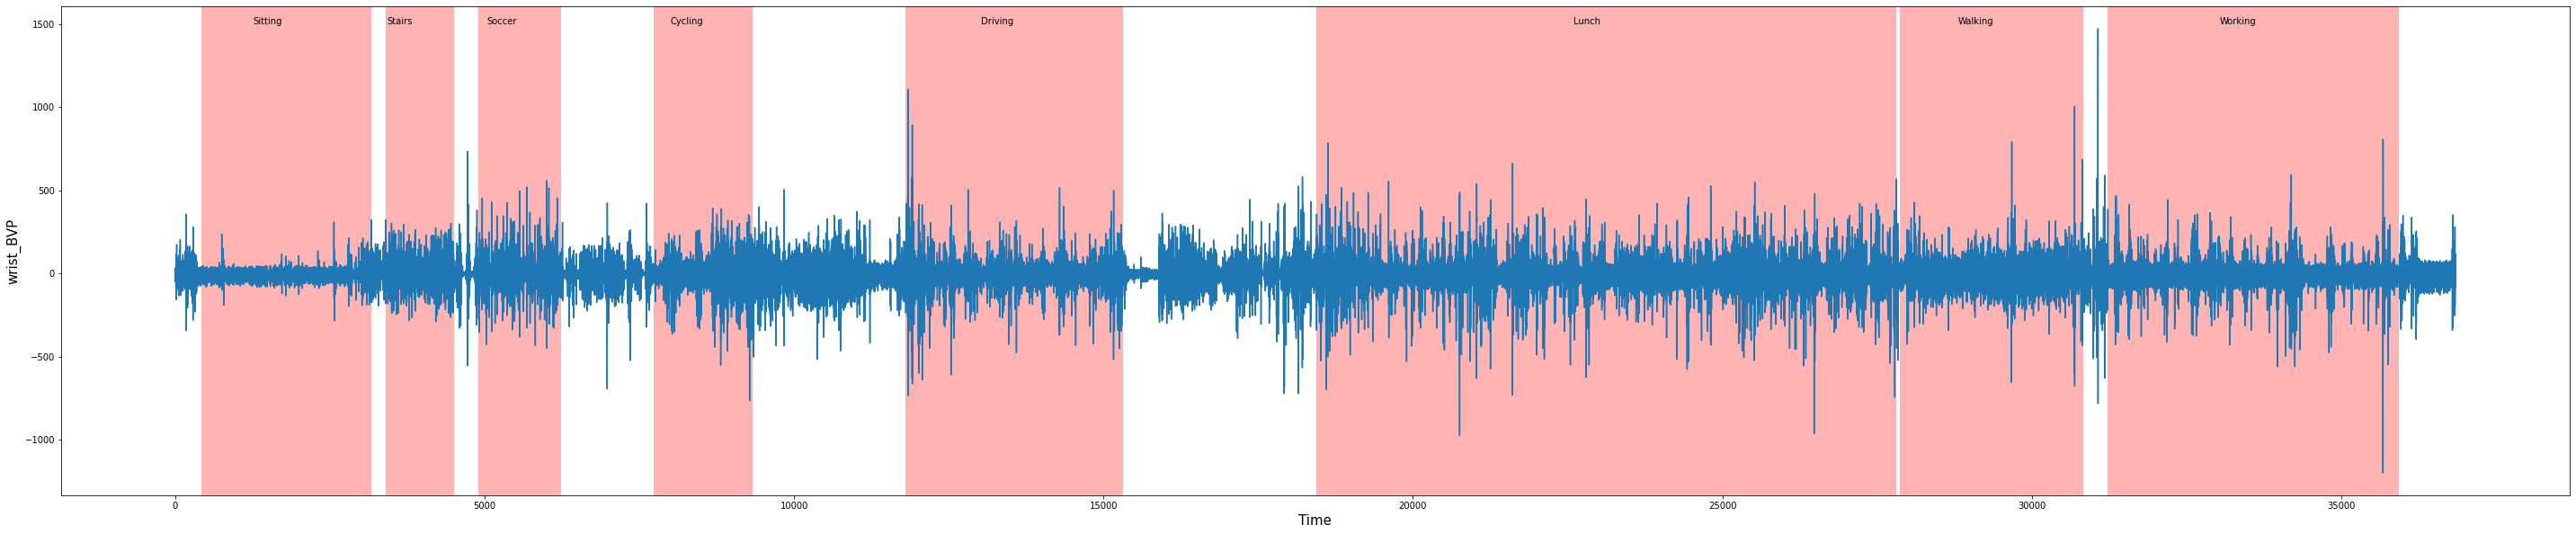

In [42]:
# Testing 2
fig, ax = plt.subplots(figsize=(50, 10))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2- 500,1500, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1

# ax.set_ylim(top = 2, bottom = -2)
signals.loc[:, 'wrist_BVP'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("wrist_BVP", fontsize=15)

Text(0, 0.5, 'chest_ECG')

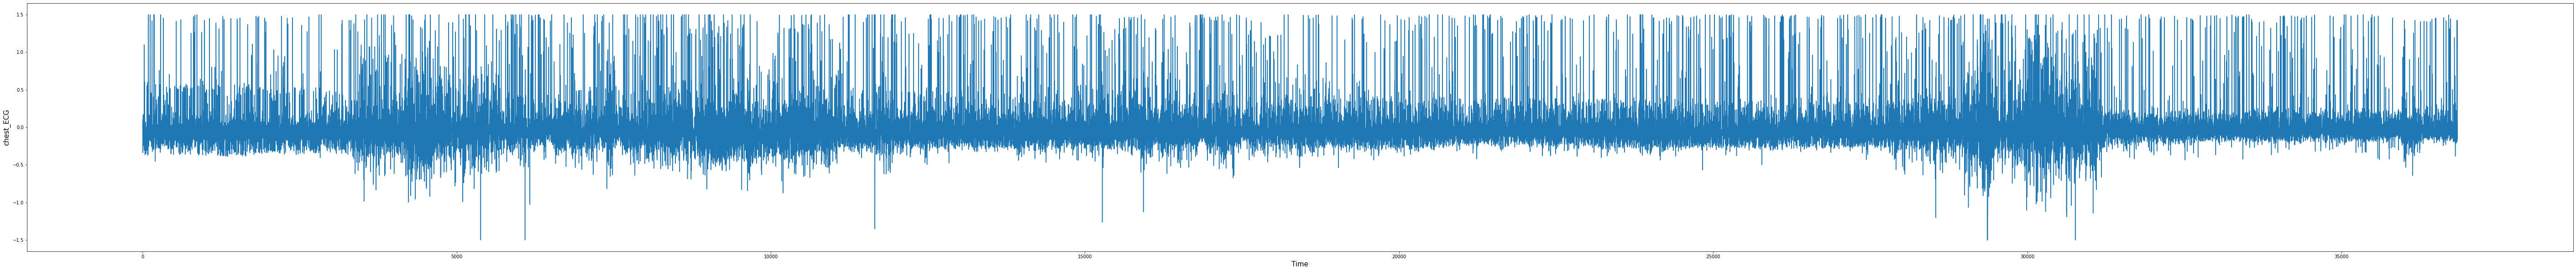

In [43]:
# Testing
fig, ax = plt.subplots(figsize=(100, 10))
style = dict(size=10, color='k')

# i = 0
# x_start = 0
# x_end = 0
# while(i < len(signals.loc[:, 'Activity'])):
#     sport_index = signals.loc[i, 'Activity']
    
#     if(sport_index != 0):
        
#         x_start = i
#         while(i < len(signals.loc[:, 'Activity'])):
#             if(signals.loc[i, 'Activity'] != sport_index):
#                 break
            
#             else:
#                 i += 1
            
#         x_end = i-1
#         sport = dic_activity[sport_index]
#         plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
#         ax.text((x_start+x_end)//2 - 500, 35, sport, **style)
        
#         x_start = 0
#         x_end = 0
    
#     else :
#         i += 1
    
# ax.set_ylim(top = 2, bottom = -2)
signals.loc[:, 'chest_ECG'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("chest_ECG", fontsize=15)

Text(0, 0.5, 'chest_ECG')

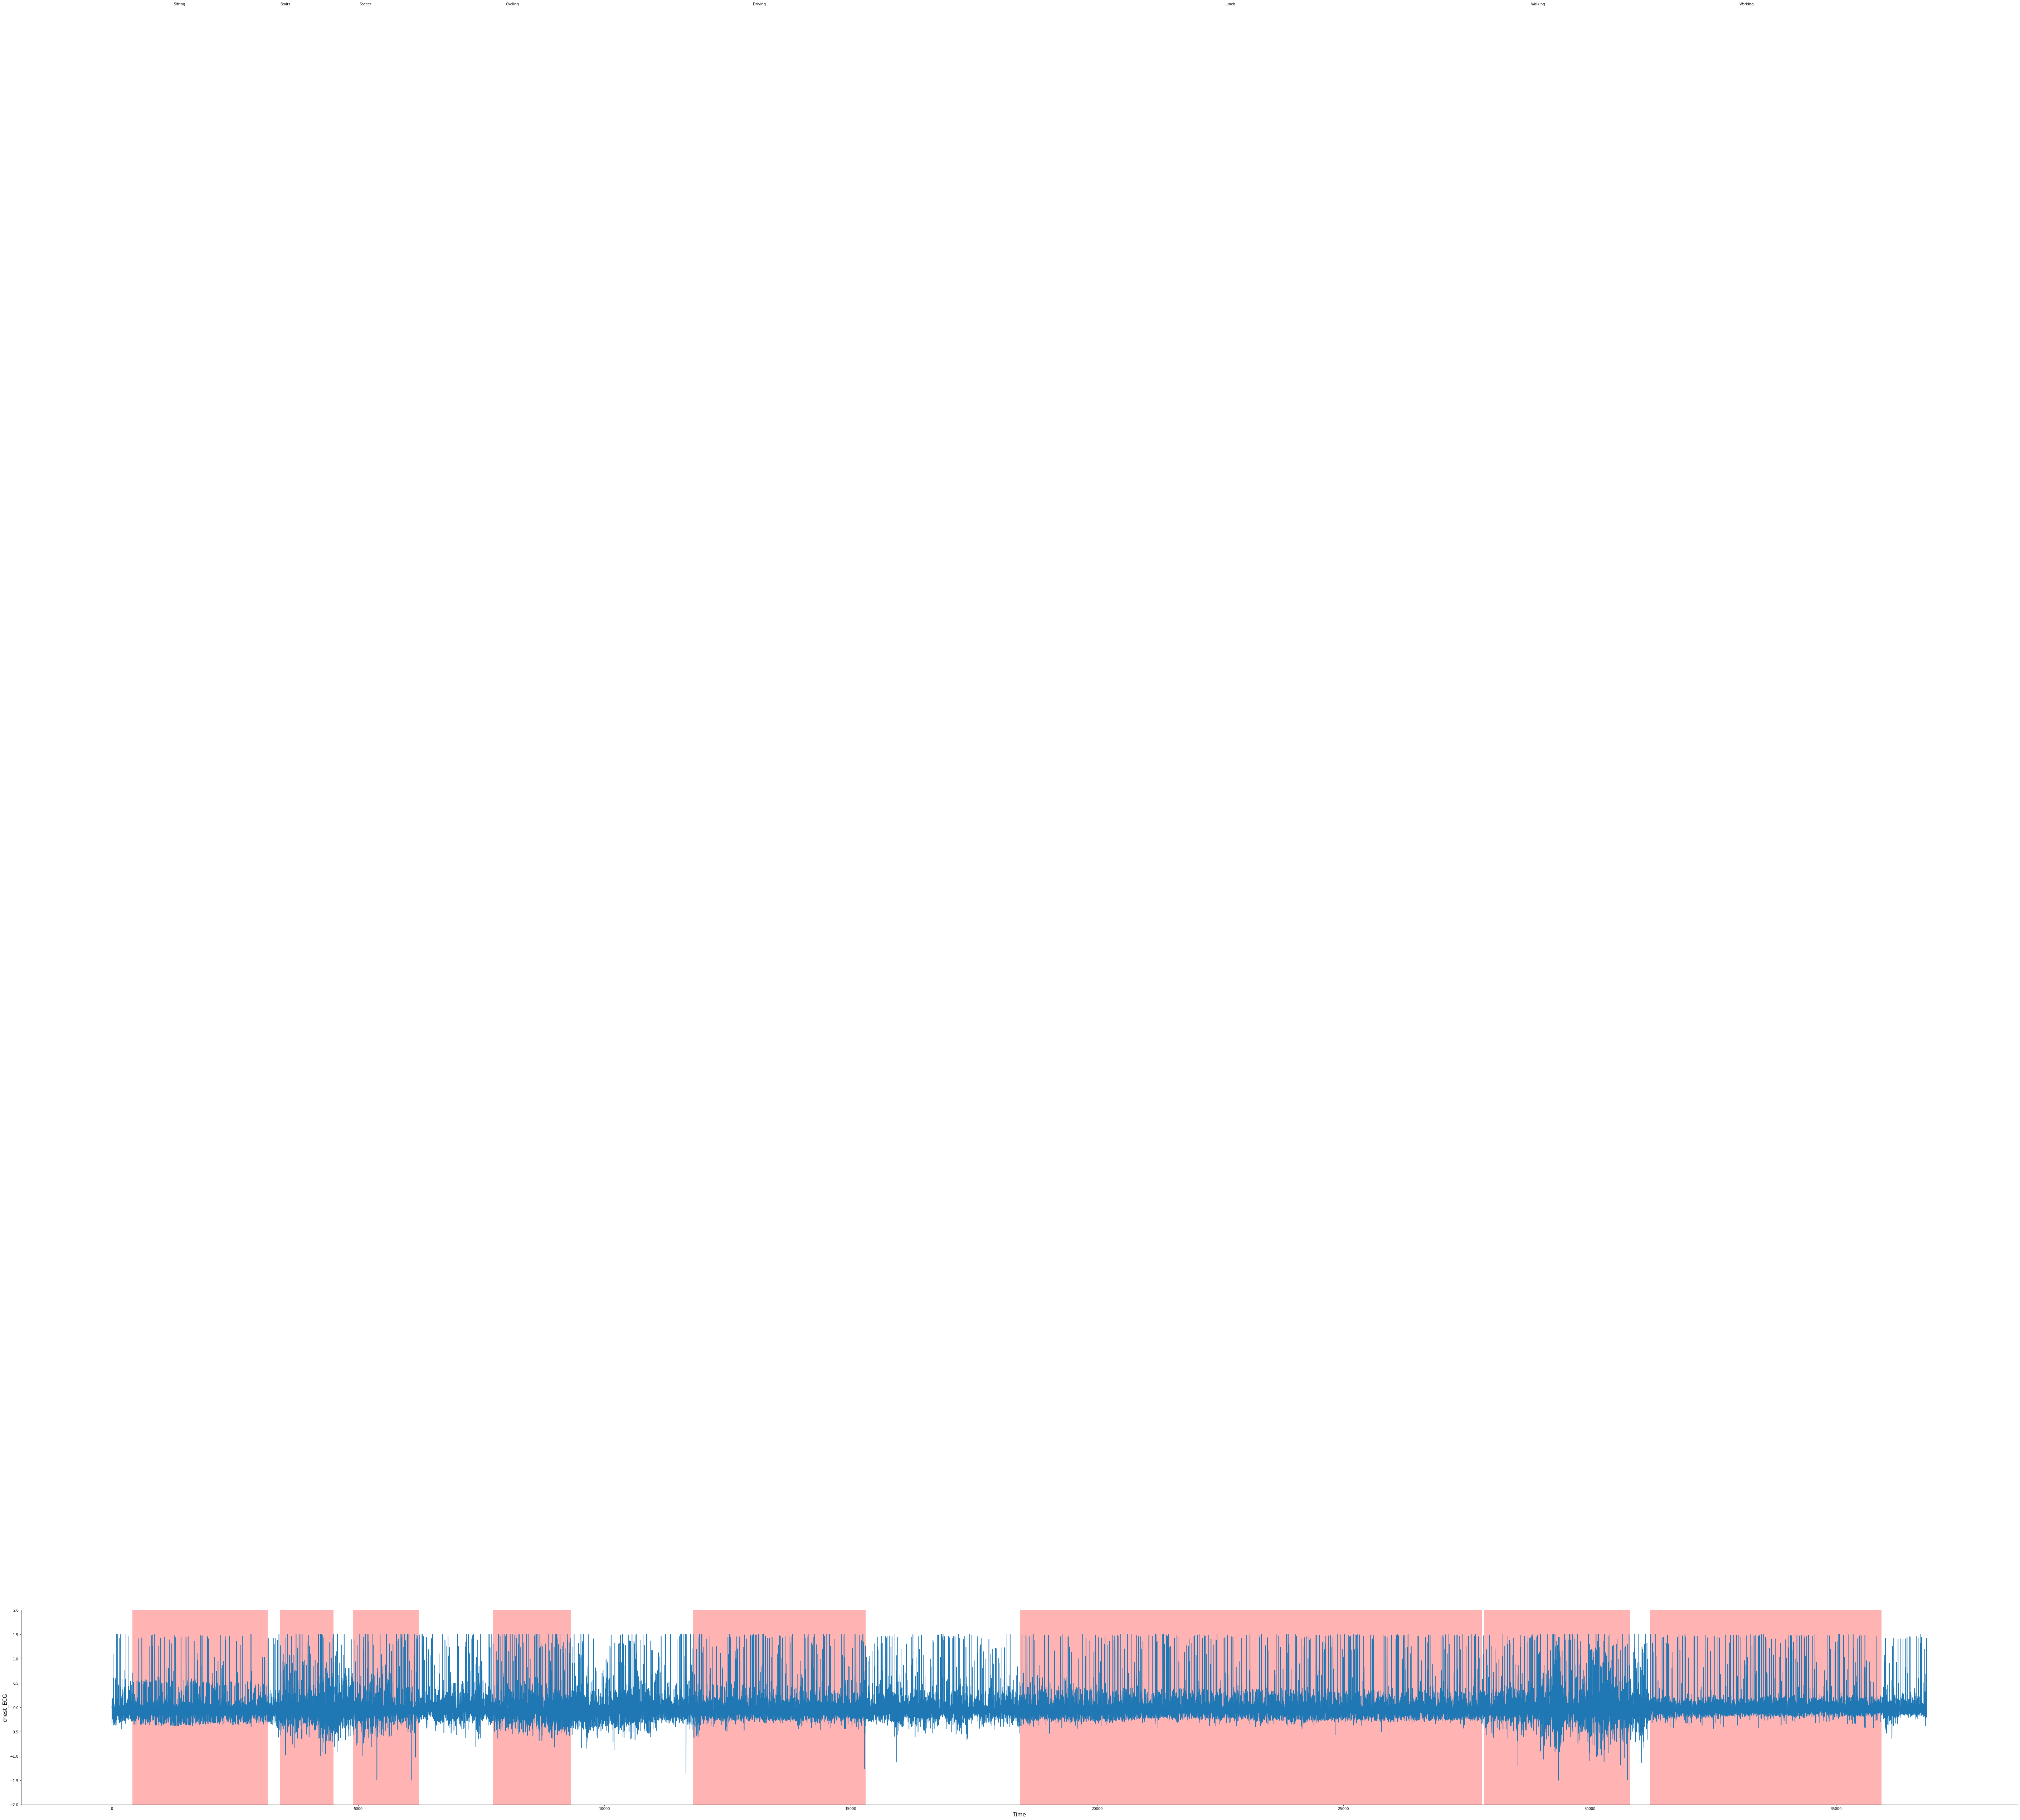

In [44]:
# Testing
fig, ax = plt.subplots(figsize=(100, 10))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 35, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1

ax.set_ylim(top = 2, bottom = -2)
signals.loc[:, 'chest_ECG'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("chest_ECG", fontsize=15)

Text(0, 0.5, 'Heartrate')

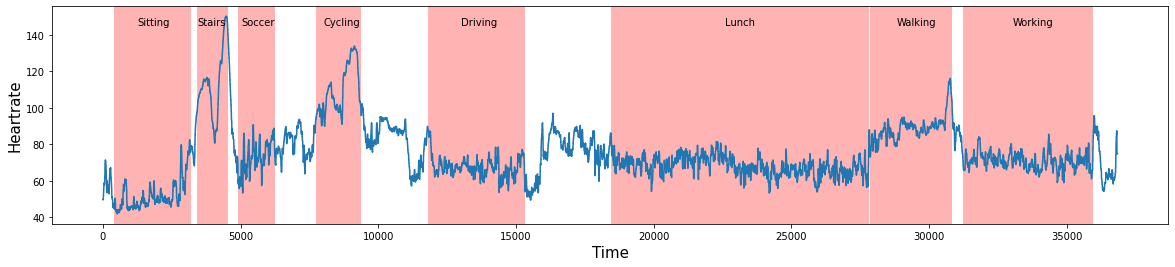

In [45]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 145, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1


signals.loc[:, 'Label'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Heartrate", fontsize=15)

Text(0, 0.5, 'chest_ECG')

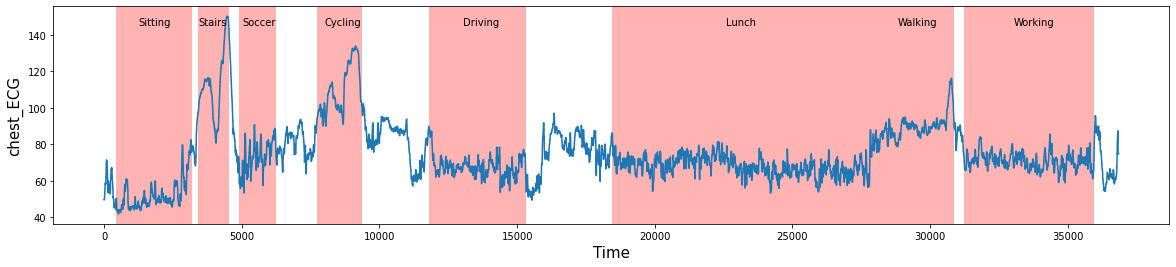

In [46]:
# Testing
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 145, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1


signals.loc[:, 'Label'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("chest_ECG", fontsize=15)

## Features

Since we're working only on one subject, his attributes don't matter to make a prediction.

In [47]:
signals.columns

Index(['chest_ACC_x', 'chest_ACC_y', 'chest_ACC_z', 'chest_Resp', 'chest_ECG',
       'wrist_ACC_x', 'wrist_ACC_y', 'wrist_ACC_z', 'wrist_BVP', 'wrist_TEMP',
       'WEIGHT', 'Gender', 'AGE', 'HEIGHT', 'SKIN', 'SPORT', 'Rpeaks',
       'Activity', 'Label', 'Subject'],
      dtype='object')

In [48]:
remove = ["Subject", "WEIGHT", "Gender", "AGE", "HEIGHT", "SKIN", "SPORT", "Activity"]
features = [column for column in list(signals.columns) if column not in remove]
features

['chest_ACC_x',
 'chest_ACC_y',
 'chest_ACC_z',
 'chest_Resp',
 'chest_ECG',
 'wrist_ACC_x',
 'wrist_ACC_y',
 'wrist_ACC_z',
 'wrist_BVP',
 'wrist_TEMP',
 'Rpeaks',
 'Label']

## Train-test split

In [49]:
X = signals[features].values
y = signals.Activity

In [50]:
# Example of confusion matrix usage to evaluate the quality of the output of a classifier on the iris data set. 
# The diagonal elements represent the number of points for which the predicted label is equal to the true label,
# while off-diagonal elements are those that are mislabeled by the classifier. 
# The higher the diagonal values of the confusion matrix the better, indicating many correct predictions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    y = np.repeat(np.arange(0,len(classes)),15)
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.tight_layout()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify = y)

## Model

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [53]:
score = tree.score(X_test, y_test)
print(score)

0.9756838905775076


Normalized confusion matrix


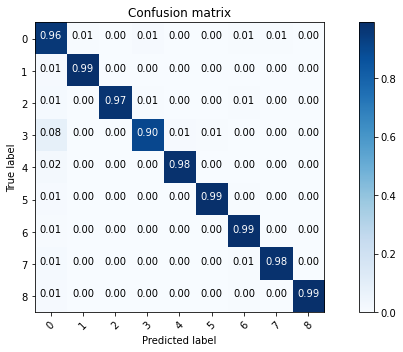

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8], normalize=True)

<AxesSubplot:>

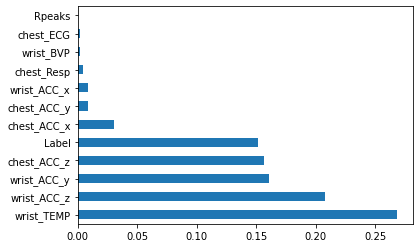

In [55]:
feat_importances = pd.Series(tree.feature_importances_, index=features)
feat_importances.nlargest(12).plot(kind='barh')

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 65, random_state = 42)
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)

In [57]:
score = rf.score(X_test, y_test)
print(score)

0.978831958315241


Normalized confusion matrix


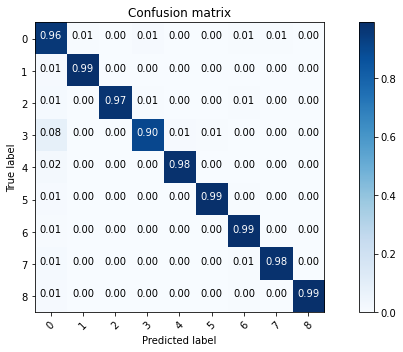

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8], normalize=True)

<AxesSubplot:>

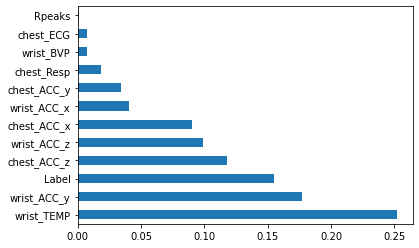

In [59]:
feat_importances = pd.Series(rf.feature_importances_, index=features)
feat_importances.nlargest(12).plot(kind='barh')

# All patients : data agregation

Now let us join the data of multiple patients to train our model.

In [60]:
def load_data(path):
    with open(path, "rb") as f:
        data = pickle.load(f, encoding="latin-1")
    
    signal = pd.DataFrame(data["signal"])
    ACC = pd.DataFrame(signal["chest"].ACC)
    ACC = ACC.iloc[::175, :]
    ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
    ACC.reset_index(drop = True, inplace=True)
    
    ECG = pd.DataFrame(signal["chest"].ECG)
    ECG = ECG.iloc[::175, :]
    ECG.reset_index(drop = True, inplace=True)
    
    Resp = pd.DataFrame(signal["chest"].Resp)
    Resp = Resp.iloc[::175, :]
    Resp.columns = ["Resp"]
    Resp.reset_index(drop = True, inplace=True)
    
    chest = pd.concat([ACC], sort=False)
    chest["Resp"] = Resp
    chest["ECG"] = ECG
    chest.reset_index(drop=True, inplace=True)
    chest = chest.add_prefix('chest_')
    
    ACC = pd.DataFrame(signal["wrist"].ACC)
    ACC = ACC.iloc[::8, :]
    ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
    ACC.reset_index(drop = True, inplace=True)
    
    EDA = pd.DataFrame(signal["wrist"].EDA)
    EDA.columns = ["EDA"]
    
    BVP = pd.DataFrame(signal["wrist"].BVP)
    BVP = BVP.iloc[::16, :]
    BVP.columns = ["BVP"]
    BVP.reset_index(drop = True, inplace=True)
    
    TEMP = pd.DataFrame(signal["wrist"].TEMP)
    TEMP.columns = ["TEMP"]
    
    wrist = pd.concat([ACC], sort=False)
    wrist["BVP"] = BVP
    wrist["TEMP"] = TEMP
    wrist.reset_index(drop = True, inplace=True)
    wrist = wrist.add_prefix('wrist_')
    
    signals = chest.join(wrist)
    for k,v in data["questionnaire"].items() :
        signals[k] = v
    
    rpeaks = data['rpeaks']
    counted_rpeaks = []
    index = 0 # index of rpeak element
    time = 175 # time portion
    count = 0 # number of rpeaks

    while(index < len(rpeaks)):
        rpeak = rpeaks[index]

        if(rpeak > time): # Rpeak appears after the time portion
            counted_rpeaks.append(count)
            count = 0
            time += 175

        else:
            count += 1
            index += 1
    # The rpeaks will probably end before the time portion so we need to fill the last portions with 0
    if(len(counted_rpeaks) < np.size(signals, axis = 0)):
        while(len(counted_rpeaks) < np.size(signals, axis = 0)):
            counted_rpeaks.append(0)
    peaks = pd.DataFrame(counted_rpeaks)
    peaks.columns = ["Rpeaks"]
    signals = signals.join(peaks)
    
    activity = pd.DataFrame(data["activity"]).astype(int)
    activity.columns = ["Activity"]
    signals = signals.join(activity)
    
    label = pd.DataFrame(data["label"])

    label = pd.DataFrame(np.repeat(label.values,8,axis=0))
    label.columns = ["Label"]
    if(np.size(label, axis = 0) < np.size(activity, axis = 0)):
        mean = label.mean()
        while(np.size(label, axis = 0) < np.size(activity, axis = 0)):
            label = label.append(mean, ignore_index=True)
    
    signals = signals.join(label)
    
    signals['Subject'] = data["subject"]
    return signals

In [61]:
dataframes = {"d1" : signals}
for i in range(2,16):
    dataframes["d" + str(i)] = load_data("data/S" + str(i) + "/S" + str(i) + ".pkl")
dataframes.keys() 

C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\3003631896.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append(mean, ignore_index=True)
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\3003631896.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append(mean, ignore_index=True)
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\3003631896.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append(mean, ignore_index=True)
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\3003631896.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append(mean, ignore_index=Tr

dict_keys(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15'])

In [62]:
df = dataframes["d1"]
for i in range(2,16):
    df = df.append(dataframes["d" + str(i)])
df.shape

C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\123114032.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataframes["d" + str(i)])
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\123114032.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataframes["d" + str(i)])
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\123114032.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataframes["d" + str(i)])
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\123114032.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataframes["d" + str(i)])
C:\Users\UPENDRA\AppData

(517956, 20)

In [63]:
# df.to_excel("Test.xlsx")

## Visualisation of our patients

In [64]:
attributes = ["Subject","WEIGHT", "Gender", "AGE", "HEIGHT", "SKIN", "SPORT"]
patients = pd.DataFrame(dataframes["d1"].loc[[0]][attributes])
for i in range(2,16):
    patients = patients.append(dataframes["d" + str(i)].loc[0,attributes])
patients

C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\76196124.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  patients = patients.append(dataframes["d" + str(i)].loc[0,attributes])
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\76196124.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  patients = patients.append(dataframes["d" + str(i)].loc[0,attributes])
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\76196124.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  patients = patients.append(dataframes["d" + str(i)].loc[0,attributes])
C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\76196124.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,Subject,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT
0,S1,78.0,m,34,182.0,3,6
0,S2,80.0,m,28,189.0,3,5
0,S3,60.0,m,25,170.0,3,5
0,S4,57.0,m,25,168.0,4,5
0,S5,70.0,f,21,180.0,3,4
0,S6,70.0,f,37,176.0,3,1
0,S7,58.0,f,21,168.0,3,2
0,S8,70.0,m,43,179.0,3,5
0,S9,60.0,f,28,167.0,4,5
0,S10,56.0,f,55,164.0,4,5


Text(0, 0.5, 'Count of People')

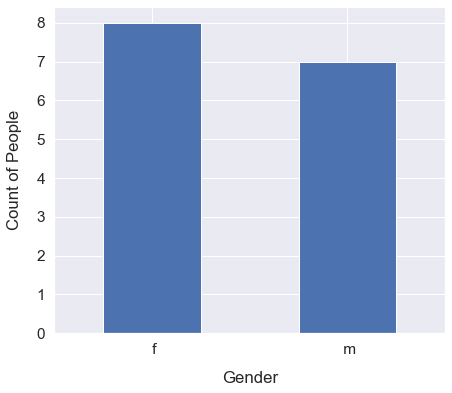

In [65]:
sns.set(font_scale=1.4)

patients["Gender"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)

Text(0, 0.5, 'Count of People')

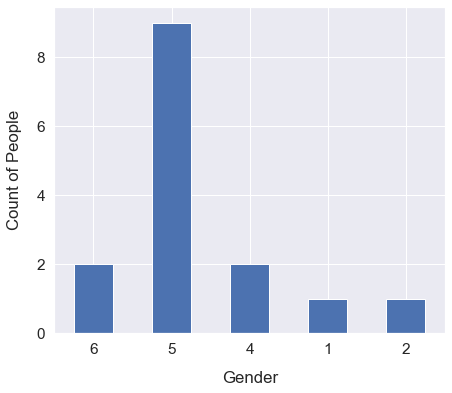

In [66]:
sns.set(font_scale=1.4)
patients["SPORT"].value_counts(sort = False).plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)

Text(0, 0.5, 'Count of People')

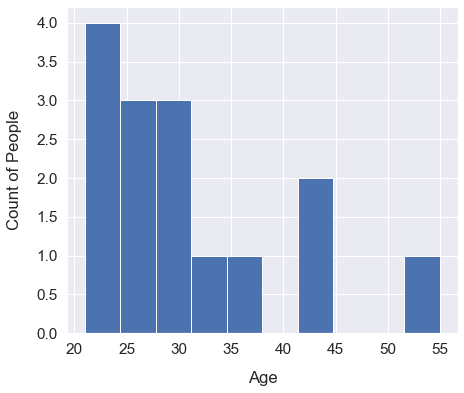

In [67]:
patients["AGE"].hist(figsize=(7, 6))
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)

## Features

In [68]:
remove = ["Subject", "Activity"]
features = [column for column in list(df.columns) if column not in remove]
features

['chest_ACC_x',
 'chest_ACC_y',
 'chest_ACC_z',
 'chest_Resp',
 'chest_ECG',
 'wrist_ACC_x',
 'wrist_ACC_y',
 'wrist_ACC_z',
 'wrist_BVP',
 'wrist_TEMP',
 'WEIGHT',
 'Gender',
 'AGE',
 'HEIGHT',
 'SKIN',
 'SPORT',
 'Rpeaks',
 'Label']

In [69]:
df['Gender'].replace(' f', 0, inplace=True)
df['Gender'].replace(' m', 1, inplace=True)

## Train-test split

In [70]:
X = df[features].values
y = df.Activity

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify = y)

## Model

### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [73]:
score = tree.score(X_test, y_test)
print(score)

0.9424584327626285


Normalized confusion matrix


C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\1906294831.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


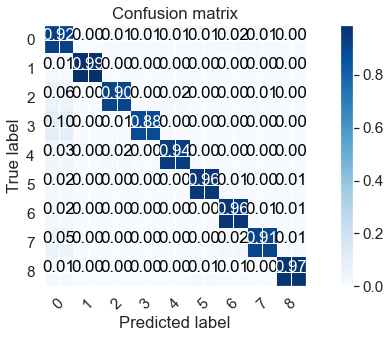

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8], normalize=True)

<AxesSubplot:>

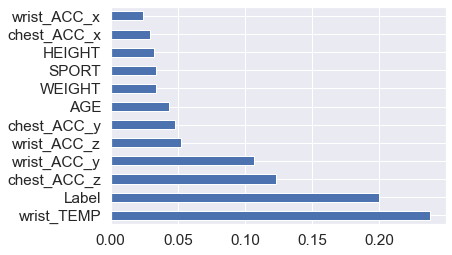

In [75]:
feat_importances = pd.Series(tree.feature_importances_, index=features)
feat_importances.nlargest(12).plot(kind='barh')

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 65, random_state = 42)
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)

In [77]:
score = rf.score(X_test, y_test)
print(score)

0.9627149796507811


Normalized confusion matrix


C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\1906294831.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


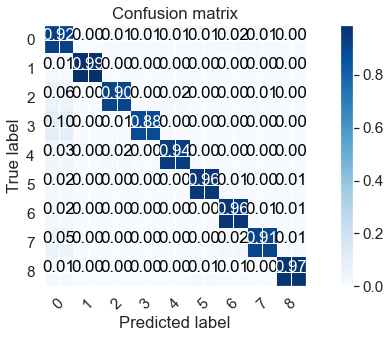

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8], normalize=True)

<AxesSubplot:>

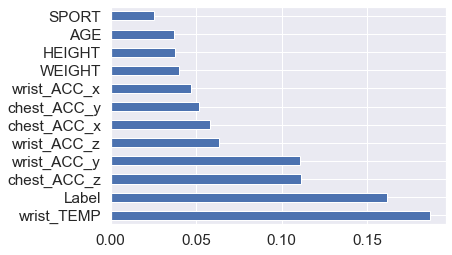

In [79]:
feat_importances = pd.Series(rf.feature_importances_, index=features)
feat_importances.nlargest(12).plot(kind='barh')

# Better repartition

By fear of our model overfitting since we have very few patients, we will use only 13 patients to train and validate our model. We will then see how the model scores on the 2 other patients.

## Features

In [80]:
remove = ["Subject", "Activity"]
features = [column for column in list(df.columns) if column not in remove]
features

['chest_ACC_x',
 'chest_ACC_y',
 'chest_ACC_z',
 'chest_Resp',
 'chest_ECG',
 'wrist_ACC_x',
 'wrist_ACC_y',
 'wrist_ACC_z',
 'wrist_BVP',
 'wrist_TEMP',
 'WEIGHT',
 'Gender',
 'AGE',
 'HEIGHT',
 'SKIN',
 'SPORT',
 'Rpeaks',
 'Label']

## Train-test split

In [81]:
df.reset_index(drop = True, inplace=True)
index_14patient = np.where(df['Subject'] == 'S13')[0].tolist()[0]
X = df.loc[:index_14patient-1, features].values
y = df.loc[:index_14patient-1, "Activity"].values

In [82]:
X_test = df.loc[index_14patient:, features].values
y_test = df.loc[index_14patient:, "Activity"].values

In [83]:
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state = 42, stratify = y)

## Model

### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)
y_pred = tree.predict(X_test)

In [85]:
score = tree.score(X_test, y_test)
print(score)

0.40660891944839245


Normalized confusion matrix


C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\1906294831.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


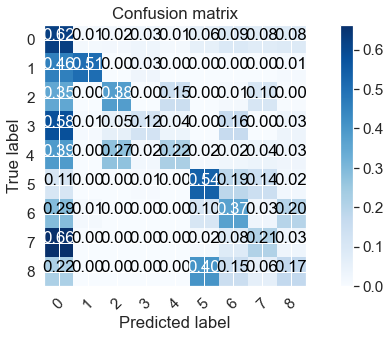

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8], normalize=True)

<AxesSubplot:>

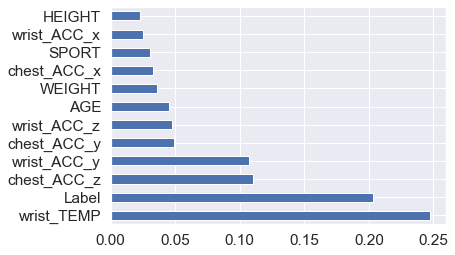

In [87]:
feat_importances = pd.Series(tree.feature_importances_, index=features)
feat_importances.nlargest(12).plot(kind='barh')

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 65, random_state = 42, max_depth=15)
rf.fit(X, y);
predictions = rf.predict(X_test)

In [89]:
score = rf.score(X_test, y_test)
print(score)

0.552577497791265


Normalized confusion matrix


C:\Users\UPENDRA\AppData\Local\Temp\ipykernel_13712\1906294831.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


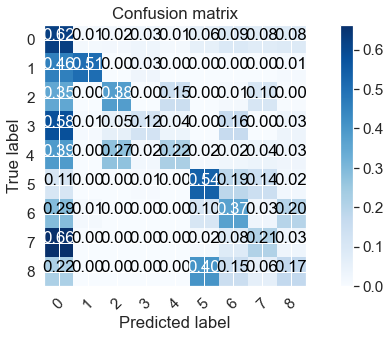

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8], normalize=True)

<AxesSubplot:>

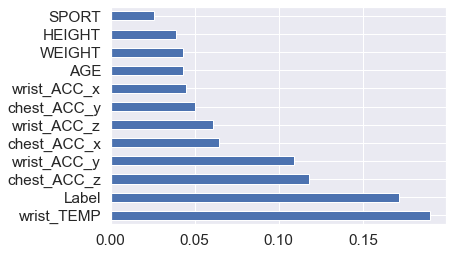

In [91]:
feat_importances = pd.Series(rf.feature_importances_, index=features)
feat_importances.nlargest(12).plot(kind='barh')

We can see that using different patients for the test makes the score drop drastically. The model has a hard time generalizing and the previous models surely have overfitted since they've all been tested on the same patients they've been trained. Having only 15 patients, it is very difficult to build a model that will better perform on unseen data.

## Saving model

In [18]:
import pickle
filename = 'final_model.sav'
pickle.dump(rf, open(filename, 'wb'))

NameError: name 'rf' is not defined

In [93]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1385.5048258304596 seconds ---
